# Loading Data

In [26]:
from pyemma.coordinates import tica
from msmbuilder.example_datasets import AlanineDipeptide
import matplotlib.pyplot as plt
from matplotlib import cm


trajs = AlanineDipeptide().get().trajectories
import numpy as np

from msmbuilder.featurizer import AtomPairsFeaturizer
pairs = []
for i in range(22):
    for j in range(i):
        pairs.append((j,i))
X = AtomPairsFeaturizer(pairs).fit_transform(trajs)

from msmbuilder.featurizer import DihedralFeaturizer
Y = DihedralFeaturizer().fit_transform(trajs)

alanine_dipeptide already is cached


# Performing tICA

In [83]:
obj_x = tica(np.vstack(X), lag = 1, dim = 2).get_output()[0]
obj_x = np.array(obj_x)

# Graphing it

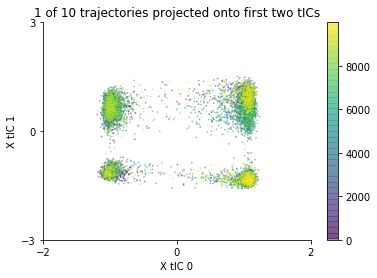

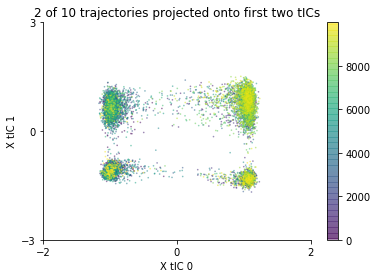

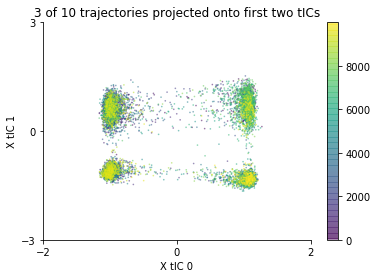

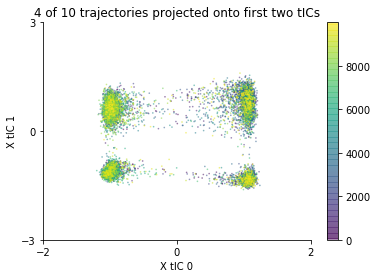

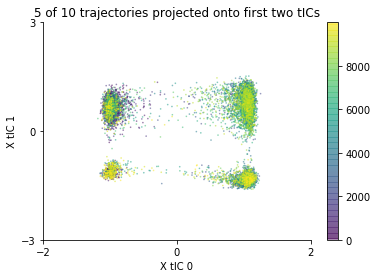

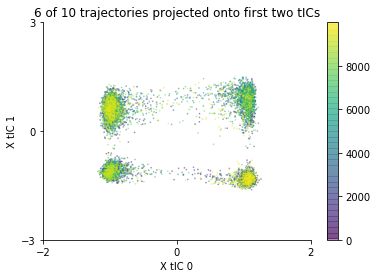

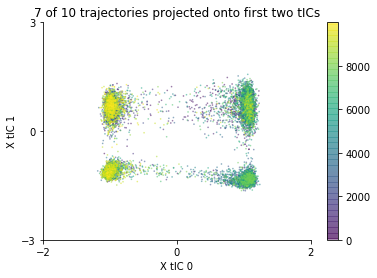

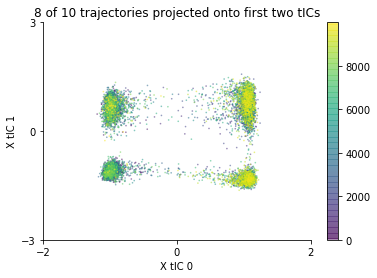

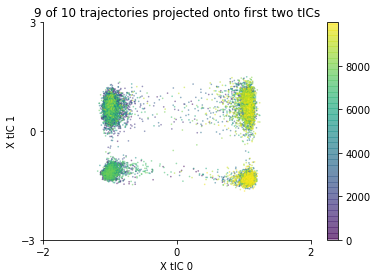

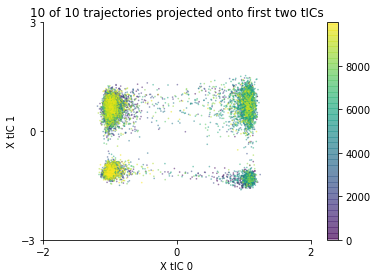

In [80]:
obj_x = obj_x.T
starting_idx = 0
ending_idx = 0
for i in range(len(X)):
    ending_idx += len(X[i])
#     print(starting_idx, ending_idx, ending_idx - starting_idx)
    x_coors = obj_x[0][starting_idx:ending_idx]
    y_coors = obj_x[1][starting_idx:ending_idx]
    
    ax = plt.subplot(111)
    plt.scatter(x_coors, y_coors, s=0.5, alpha=0.45, c=range(len(y_coors)), cmap=cm.viridis)
    plt.xlabel('X tIC 0')
    plt.ylabel('X tIC 1')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.xticks([-2,0,2])
    plt.yticks([-3,0,3])
    label = str(i+1)+' of '+str(len(x)) +' trajectories projected onto first two tICs'
    plt.title(label)
    starting_idx += len(X[i])
    plt.colorbar()
    plt.show()
